In [3]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
fileused='/content/drive/MyDrive/ML/IMDB Dataset.csv'
from sklearn.linear_model import LogisticRegression
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report,log_loss,mean_squared_error
from sklearn.datasets import load_iris,make_regression

df=pd.read_csv(fileused)
def preprocess(doc):
  words=re.findall(r"\b[a-z]+\b",str(doc).lower())
  return " ".join(words)
df["cleaned"]=df["review"].apply(preprocess)
vectorizer=CountVectorizer(binary=True)
X=vectorizer.fit_transform(df["cleaned"])
label_mapping={"negative":0, "positive":1}
df["label"]=df["sentiment"].map(label_mapping)
y=df["label"].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LogisticRegression(solver='saga',max_iter=1000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy is ",accuracy_score(y_test,y_pred))
print("\n")
print("Classification report:\n")
print(classification_report(y_test,y_pred))
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred))



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy is  0.8852


Classification report:

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      4961
           1       0.88      0.89      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion matrix:
 [[4376  585]
 [ 563 4476]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Log Loss:0.1356
Test Log Loss:0.1111
Training Brier Score:0.0201
Test Brier Score:0.0127


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
Valu

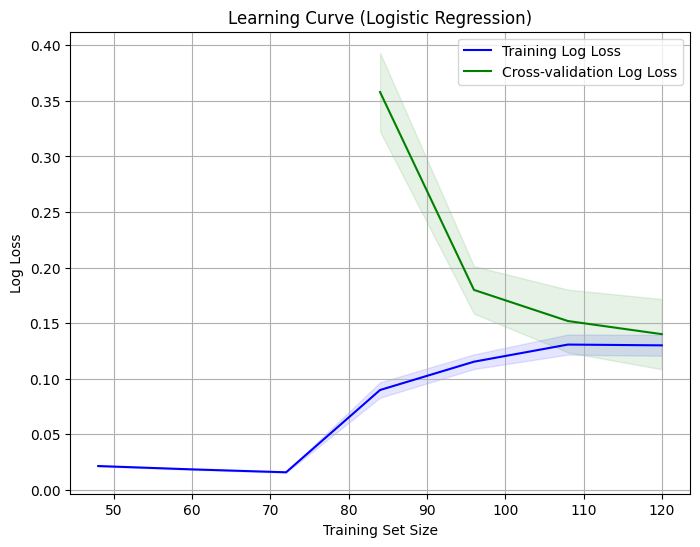

In [7]:
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt
X,y=load_iris(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LogisticRegression(max_iter=200,multi_class="multinomial")
model.fit(X_train,y_train)
y_prob_test=model.predict_proba(X_test)
y_prob_train=model.predict_proba(X_train)
test_log_loss=log_loss(y_test,y_prob_test)
train_log_loss=log_loss(y_train,y_prob_train)
test_brier=np.mean([brier_score_loss((y_test==i).astype(int),y_prob_test[:,i]) for i in range(y_prob_test.shape[1])])
train_brier=np.mean([brier_score_loss((y_train==i).astype(int),y_prob_train[:,i]) for i in range(y_prob_train.shape[1])])
print(f"Training Log Loss:{train_log_loss:.4f}")
print(f"Test Log Loss:{test_log_loss:.4f}")
print(f"Training Brier Score:{train_brier:.4f}")
print(f"Test Brier Score:{test_brier:.4f}")
train_sizes,train_scores,test_scores=learning_curve(model,X,y,cv=5,scoring="neg_log_loss",n_jobs=-1,train_sizes=np.linspace(0.1,1.0,10))
train_scores=-train_scores
test_scores=-test_scores
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.figure(figsize=(8,6))
plt.plot(train_sizes,train_mean,label="Training Log Loss",color="blue")
plt.plot(train_sizes,test_mean,label="Cross-validation Log Loss",color="green")
plt.fill_between(train_sizes,train_mean-train_std,train_mean+train_std,alpha=0.1,color="blue")
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std,alpha=0.1,color="green")
plt.title("Learning Curve (Logistic Regression)")
plt.xlabel("Training Set Size")
plt.ylabel("Log Loss")
plt.legend(loc="best")
plt.grid(True)
plt.show()

